In [1]:
# Przygotuj wszystko tak jak na zajęciach 6 i zadania o fashion mnist. Jedyną różnicą będzie
# sieć:
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

#model = Sequential()
#model.add(Conv2D(filters = 4, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1))) 
#1 ozacza, że rysunki nie są kolorowe; gdyby były kolorowe, czyli rgb - to byłoby 3
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))

# następnie dodając kolejne warstwy konwolucyjne lub warstwy ukryte spróbuj poprawić wynik 
# działania sieci
#podajemy liczbę filtrów, a on sam dobiera jakie to mają być; zawsze przed ostatnią warstwą relu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
EPOCHS = 20

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 128)               173184    
                                                                 
 dense_1 (Dense)             (None, 36)                4644      
                                                                 
 dense_2 (Dense)             (None, 10)                370       
                                                        

In [5]:
history = model.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8504 - accuracy: 0.8135 - val_loss: 0.4193 - val_accuracy: 0.8509
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3354 - accuracy: 0.8792 - val_loss: 0.3356 - val_accuracy: 0.8809
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2852 - accuracy: 0.8964 - val_loss: 0.3174 - val_accuracy: 0.8857
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2565 - accuracy: 0.9058 - val_loss: 0.3458 - val_accuracy: 0.8817
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2340 - accuracy: 0.9126 - val_loss: 0.3321 - val_accuracy: 0.8888
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2169 - accuracy: 0.9192 - val_loss: 0.3047 - val_accuracy: 0.8939
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1957 - accuracy: 0.9270 - val_loss: 0.3098 - val_accuracy:

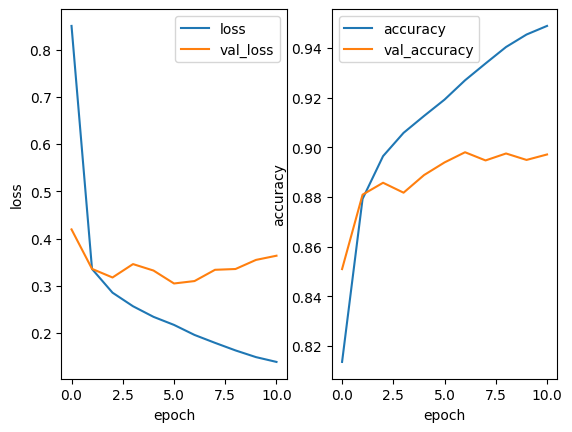

In [6]:
hist = pd.DataFrame(history.history)
hist

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

313/313 [==============================] - 0s 920us/step


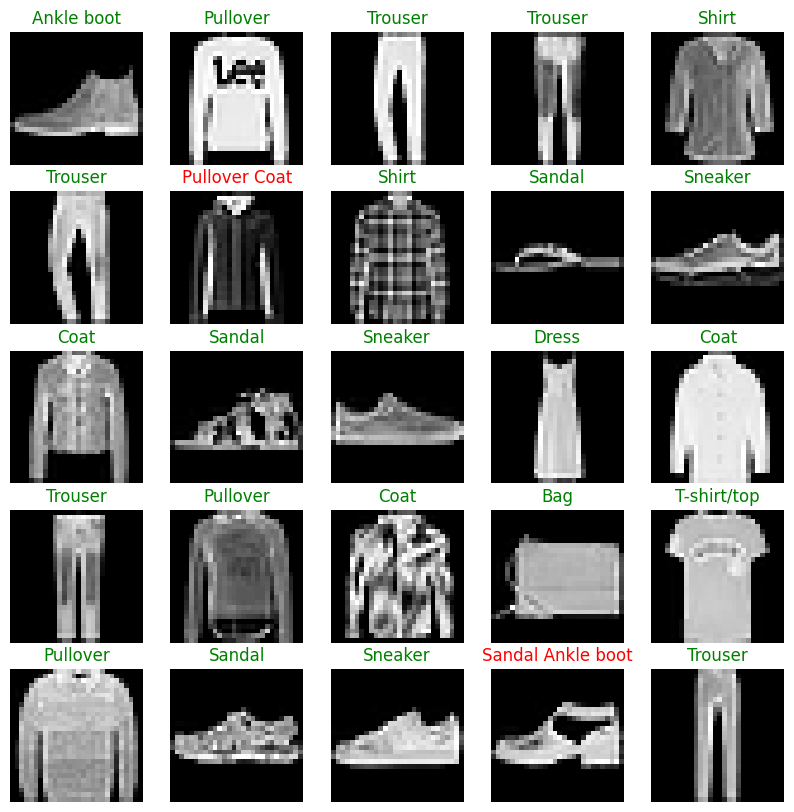

In [7]:
y_pred = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    if np.argmax(y_pred[i]) == y_test[i]:
        plt.title(class_names[y_test[i]], color = 'green')
    else: 
        plt.title(class_names[np.argmax(y_pred[i])]+" "+class_names[y_test[i]], color = 'red')